In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [5]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.17537263,  0.01487842,  0.18846017, -0.2794713 ,  0.26486522,
          0.1067757 ,  0.06501791, -0.03542021, -0.01735976, -0.04175016,
          0.26663697, -0.12496503, -0.12006146, -0.14214548, -0.1529741 ,
         -0.2920696 , -0.03916517, -0.21294233, -0.19193715,  0.2880507 ,
         -0.17508245, -0.09455268,  0.09086272,  0.08718327,  0.09580612,
         -0.12699735, -0.25230584,  0.21787941, -0.14187679, -0.20006362,
          0.1721637 , -0.02219126, -0.2039935 , -0.24608926,  0.13730776,
         -0.17207602,  0.2602594 , -0.06393678,  0.02833691, -0.29299256,
          0.12364808,  0.292256  , -0.0762921 ,  0.15874475, -0.06229836,
          0.21720219, -0.03783512,  0.22765201, -0.11780517, -0.14554206,
         -0.25019246,  0.11959121, -0.29824317, -0.02435493, -0.26951462,
         -0.14140104,  0.13551459, -0.2813691 ,  0.06245339, -0.20173286,
          0.2757817 ,  0.21290982, -0.09746

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None,3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
model=keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
inputs = keras.Input(shape=(3,), name="my_input")
inputs.shape

TensorShape([None, 3])

In [11]:
inputs.dtype

tf.float32

In [12]:
features=layers.Dense(64, activation="relu")(inputs)

In [13]:
features.shape

TensorShape([None, 64])

In [14]:
outputs = layers.Dense(10, activation="softmax")(features)

In [15]:
outputs.shape

TensorShape([None, 10])

In [16]:
model = keras.Model(inputs = inputs, outputs = outputs)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [18]:
vocabulary_size=10000
num_tags=100
num_departments=4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body=keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features=layers.Dense(64, activation="relu")(layers.Concatenate()([title, text_body, tags]))

In [19]:
priority=layers.Dense(1, activation="sigmoid", name="priority")(features)

In [20]:
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

In [21]:
model=keras.Model(inputs=[title, text_body, tags],
                  outputs=[priority, department])

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [23]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

40/40 [==============================] - 0s 5ms/step - loss: 15.8849 - priority_loss: 0.3246 - department_loss: 15.5603 - priority_mean_absolute_error: 0.4945 - department_accuracy: 0.1000


[15.88489055633545,
 0.3245505392551422,
 15.560336112976074,
 0.4944632947444916,
 0.10000000149011612]

In [24]:
priority_preds, department_preds = model.predict(
[title_data, text_body_data, tags_data])

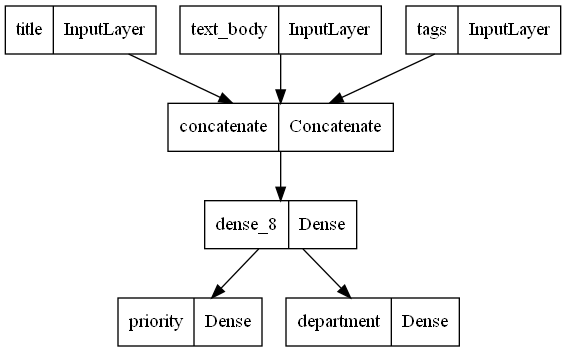

In [25]:
keras.utils.plot_model(model, "ticket_classifier.png")

In [26]:
!pip install pydot


In [27]:
!pip install graphviz

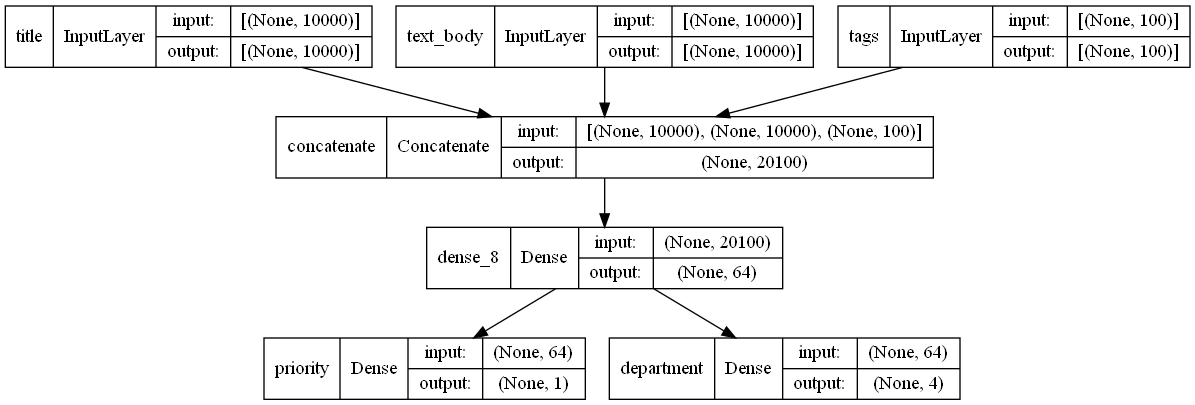

In [28]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [29]:
model.layers

In [30]:
model.layers[5].input

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_8')>

In [31]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

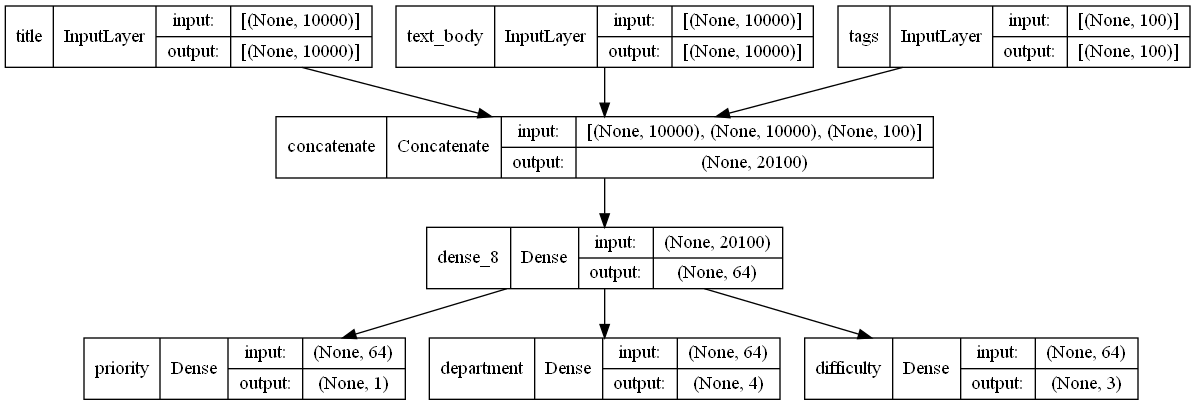

In [33]:
keras.utils.plot_model(
    new_model, "updated_ticket_classifier.png", show_shapes=True)